# Question and Answering using BERT Model <br>
## Installing Required Libraries

In [ ]:
!pip install newspaper3k
!pip install transformers
!pip install torch
!pip install matplot
!pip install pandas 
!pip install nlp
!pip install numpy
!pip install seaborn


## Importing the model from loadModel.py


In [ ]:

import create_dataset
from loadModel import *
import textwrap

In [ ]:
p = create_dataset.Create_DS()
p.loadTxt("John is a 10 year old boy. He is the son of Robert Smith.  Elizabeth Davis is Robert's wife. She teaches at UC Berkeley. Sophia Smith is Elizabeth's daughter. She studies at UC Davis")
model = QAPipe(p.ds)
question = "Which college does John’s sister attend?"
answer_start_index,answer_end_index,start_token_score,end_token_score,s_Scores,e_Scores,answer=model.get_output(question)

### Let check the answer 

In [16]:
wrapper = textwrap.TextWrapper(width=80)
print(wrapper.fill(p.ds)+"\n")

print("Question: "+question)



John is a 10 year old boy. He is the son of Robert Smith.  Elizabeth Davis is
Robert's wife. She teaches at UC Berkeley. Sophia Smith is Elizabeth's daughter.
She studies at UC Davis

Question: Which college does John’s sister attend?


In [17]:
print("Answer : " + answer)

Answer : uc davis


In [18]:
tokens = model.generate_text_from_token()
print("Passage: ")
print(wrapper.fill(p.ds)+"\n")
print("Question: \n"+question+"\n")


print("Tokens: \n",tokens)
print("\nSegment Ids: \n",model.segment_ids)
print("\n Input Ids: \n" ,model.input_ids)

Passage: 
John is a 10 year old boy. He is the son of Robert Smith.  Elizabeth Davis is
Robert's wife. She teaches at UC Berkeley. Sophia Smith is Elizabeth's daughter.
She studies at UC Davis

Question: 
Which college does John’s sister attend?

Tokens: 
 ['[CLS]', 'which', 'college', 'does', 'john', '’', 's', 'sister', 'attend', '?', '[SEP]', 'john', 'is', 'a', '10', 'year', 'old', 'boy', '.', 'he', 'is', 'the', 'son', 'of', 'robert', 'smith', '.', 'elizabeth', 'davis', 'is', 'robert', "'", 's', 'wife', '.', 'she', 'teaches', 'at', 'uc', 'berkeley', '.', 'sophia', 'smith', 'is', 'elizabeth', "'", 's', 'daughter', '.', 'she', 'studies', 'at', 'uc', 'davis', '[SEP]']

Segment Ids: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

 Input Ids: 
 [101, 2029, 2267, 2515, 2198, 1521, 1055, 2905, 5463, 1029, 102, 2198, 2003, 1037, 2184, 2095, 2214, 2879, 1012, 2002, 2003, 19

In [19]:
for token,id in zip(tokens,model.input_ids):
    if id == model.tokenizer.cls_token_id:
        print('')
    if id == model.tokenizer.sep_token_id:
        print('')
    print('{:<12} {:>6,}'.format(token,id))
    if id == model.tokenizer.cls_token_id:
        print('')
    if id== model.tokenizer.sep_token_id:
        print('')


[CLS]           101

which         2,029
college       2,267
does          2,515
john          2,198
’             1,521
s             1,055
sister        2,905
attend        5,463
?             1,029

[SEP]           102

john          2,198
is            2,003
a             1,037
10            2,184
year          2,095
old           2,214
boy           2,879
.             1,012
he            2,002
is            2,003
the           1,996
son           2,365
of            1,997
robert        2,728
smith         3,044
.             1,012
elizabeth     3,870
davis         4,482
is            2,003
robert        2,728
'             1,005
s             1,055
wife          2,564
.             1,012
she           2,016
teaches      12,011
at            2,012
uc           15,384
berkeley      8,256
.             1,012
sophia        9,665
smith         3,044
is            2,003
elizabeth     3,870
'             1,005
s             1,055
daughter      2,684
.             1,012
she           2,

## Visualizing Socres


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (16,8)

In [21]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

In [22]:
print(token_labels)

['[CLS] -  0', 'which -  1', 'college -  2', 'does -  3', 'john -  4', '’ -  5', 's -  6', 'sister -  7', 'attend -  8', '? -  9', '[SEP] - 10', 'john - 11', 'is - 12', 'a - 13', '10 - 14', 'year - 15', 'old - 16', 'boy - 17', '. - 18', 'he - 19', 'is - 20', 'the - 21', 'son - 22', 'of - 23', 'robert - 24', 'smith - 25', '. - 26', 'elizabeth - 27', 'davis - 28', 'is - 29', 'robert - 30', "' - 31", 's - 32', 'wife - 33', '. - 34', 'she - 35', 'teaches - 36', 'at - 37', 'uc - 38', 'berkeley - 39', '. - 40', 'sophia - 41', 'smith - 42', 'is - 43', 'elizabeth - 44', "' - 45", 's - 46', 'daughter - 47', '. - 48', 'she - 49', 'studies - 50', 'at - 51', 'uc - 52', 'davis - 53', '[SEP] - 54']


In [23]:
print(start_token_score)
print(answer_start_index)


6.26
52


### Start Word scores 

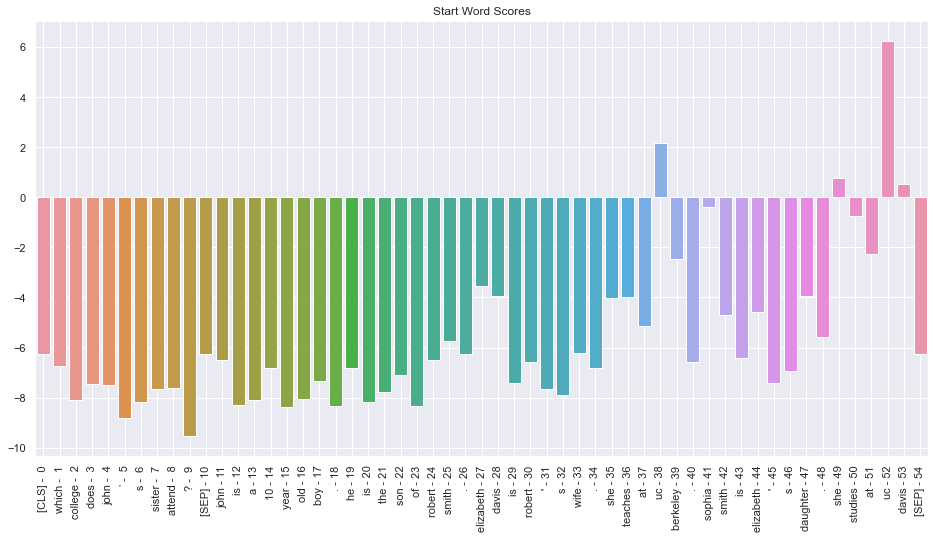

In [24]:
ax = sns.barplot(x=token_labels,y=s_Scores,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start Word Scores")
plt.show()

### End Word Score

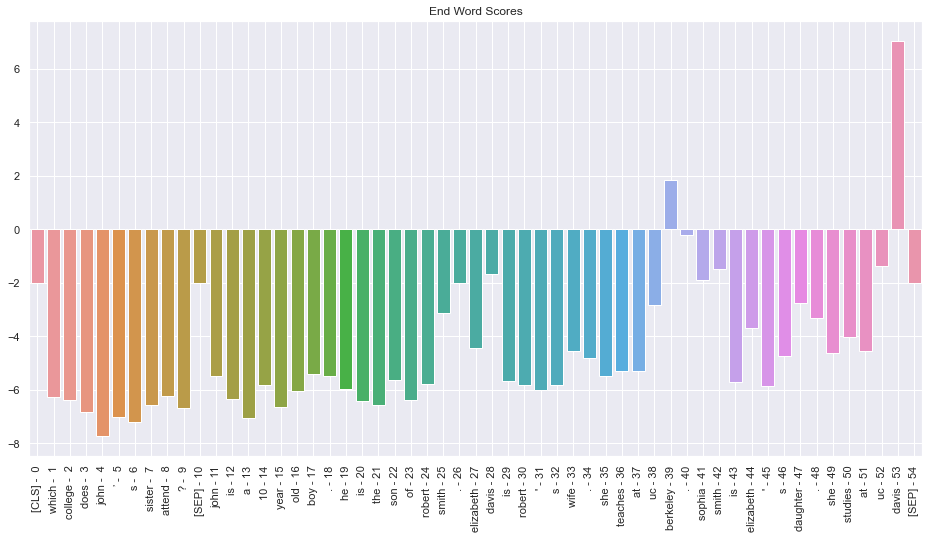

In [25]:
ax =sns.barplot(x=token_labels,y=e_Scores,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End Word Scores")
plt.show()

Visualizing in a single bar plot

In [26]:
import pandas as pd
#to store the tokens and scores in a Panda Dataframe
scores = []
for (i, token_label) in enumerate(token_labels):

    # Add the token's start score as one row.
    scores.append({'token_label': token_label, 
                   'score': s_Scores[i],
                   'marker': 'start'})
    
    # Add  the token's end score as another row.
    scores.append({'token_label': token_label, 
                   'score': e_Scores[i],
                   'marker': 'end'})
    
df = pd.DataFrame(scores)



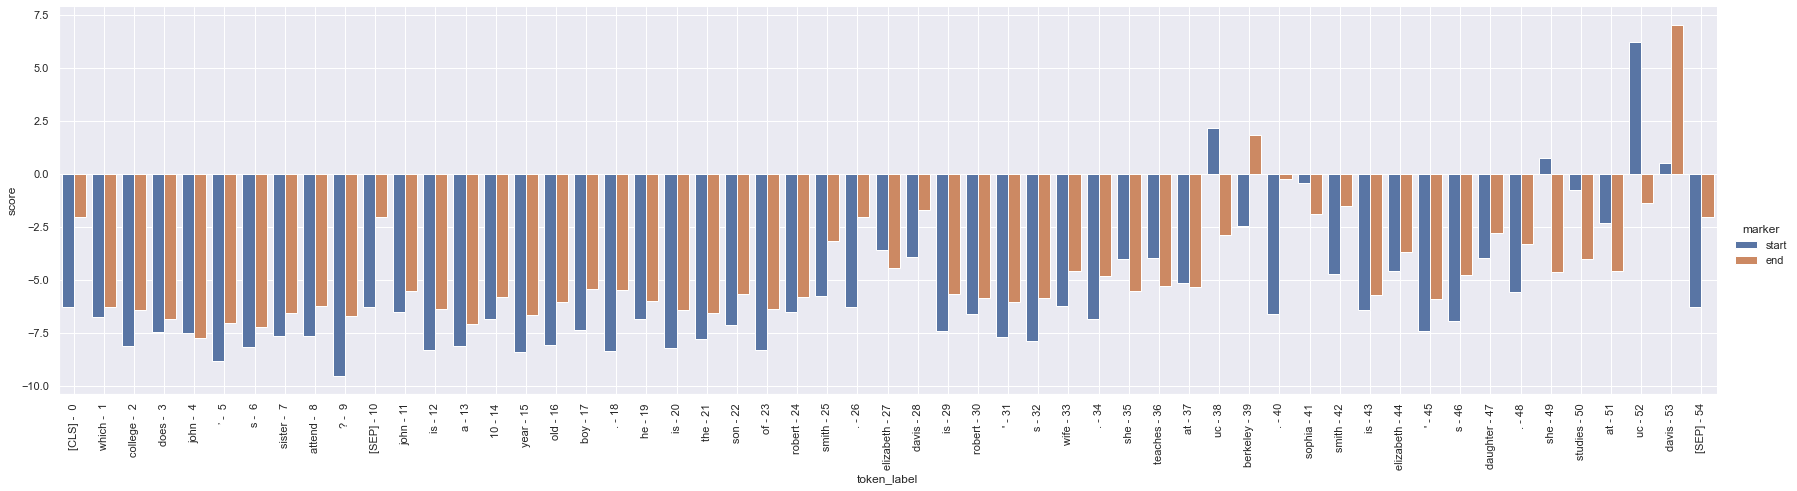

In [27]:
# Draw a grouped barplot to show start and end scores for each word.
# The "hue" parameter is where we tell it which datapoints belong to which
# of the two series.
g = sns.catplot(x="token_label", y="score", hue="marker", data=df,
                kind="bar", height=6, aspect=4)

# Turn the xlabels vertical.
g.set_xticklabels(g.ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
g.ax.grid(True)


Fine Tuning on custom Data Set

In [28]:
from FineTune import *
from create_Squad_DS import *


Creating parallel lists of contexts, questions, and answers (note that the contexts here are repeated since there are multiple questions per context)
The contexts and questions are just strings. The answers are dicts containing the subsequence of the passage with the correct answer as well as an integer indicating the character at which the answer begins. In order to train a model on this data we need (1) the tokenized context/question pairs, and (2) integers indicating at which token positions the answer begins and ends.

In [29]:
train_contexts, train_questions, train_answers = read_squad('squad_Sample.json')
val_contexts, val_questions, val_answers = read_squad('Val.json')


Getting the character position at which the answer ends in the passage

In [30]:
add_end_idx(train_answers, train_contexts)
add_end_idx(val_answers, val_contexts)


In [31]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_contexts, train_questions, truncation=True, padding=True)
val_encodings = tokenizer(val_contexts, val_questions, truncation=True, padding=True)

 Convert character start/end positions to token start/end positions

In [32]:
add_token_positions(train_encodings, train_answers)
add_token_positions(val_encodings, val_answers)

In [33]:
train_dataset = SquadDataset(train_encodings)
val_dataset = SquadDataset(val_encodings)

In [34]:
from transformers import BertForQuestionAnswering
model = BertForQuestionAnswering.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased a

In [35]:
from torch.utils.data import DataLoader
from transformers import AdamW,TrainingArguments, Trainer,default_data_collator
args = TrainingArguments(
    f"test-squad",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
)
data_collator = default_data_collator
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)
trainer.train()


model.train()

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)

for epoch in range(3):
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        start_positions = batch['start_positions']
        end_positions = batch['end_positions']
        outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
        loss = outputs[0]
        loss.backward()
        optim.step()

model.eval()


Epoch,Training Loss,Validation Loss,Runtime,Samples Per Second
1,No log,5.032540,14.637800,1.366000
2,No log,5.008301,14.667100,1.364000
3,No log,4.996737,14.751300,1.356000


BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_